In [1]:
# installing worldbank data package of python
!pip install wbdata

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
import wbdata as wb
import pandas as pd
import numpy as np

Based on the topic of climate change, below are some relevant indicators that can be explored:

Greenhouse gas emissions: This indicator measures the total amount of greenhouse gases emitted by a country, including carbon dioxide, methane, and nitrous oxide. This is a critical metric in understanding a country's contribution to global climate change.

Renewable energy production: This indicator measures the share of renewable energy sources, such as wind, solar, and hydropower, in a country's total energy production. Increasing the share of renewable energy is crucial for reducing greenhouse gas emissions and combating climate change.

Forest cover: This indicator measures the percentage of a country's land area covered by forests. Forests play a critical role in mitigating climate change by sequestering carbon dioxide from the atmosphere.



Arable land: ?????

Urbanization: This indicator measures the percentage of a country's population living in urban areas. Urbanization can lead to increased energy consumption and greenhouse gas emissions, as well as increased vulnerability to the impacts of climate change

In [56]:
wb.search_indicators('clean water')

id             name
-------------  ----------------------------------------------------------
SPI.D3.6.WTRS  GOAL 6: Clean Water and Sanitation (5 year moving average)

In [77]:
# These are the necessary codes for generating the dataset
codes = {
    'AG.LND.FRST.ZS':'Forest area (% of land area)',
    'JI.POP.URBN.ZS':'Urban population, total (% of total population)',
    'EN.ATM.GHGT.KT.CE' : 'Total greenhouse gas emissions (kt of CO2 equivalent)',
    '4.1_SHARE.RE.IN.ELECTRICITY':'Renewable electricity (% in total electricity output)',
    'AG.LND.ARBL.HA':'Arable land (hectares)',

}
df = wb.get_dataframe(codes, country='all',convert_date=True)

# Cleaning and renaming the column
df = df.reset_index()
df = df.rename(columns={'country': 'Country', 'date': 'Year'})

# Saving the df
df.to_csv('df.csv', index=False)

In [78]:
df=pd.read_csv('/content/df.csv')

In [79]:
df.dropna(inplace=True)

In [80]:
df.head()

,Country,Year,Forest area (% of land area),"Urban population, total (% of total population)",Total greenhouse gas emissions (kt of CO2 equivalent),Renewable electricity (% in total electricity output),Arable land (hectares)
47,Afghanistan,2007-01-01,1.852782,21.165411,17139.999390,72.000000,7794000.0
51,Afghanistan,2011-01-01,1.852782,24.043685,29409.999847,82.487562,7791000.0
53,Afghanistan,2013-01-01,1.852782,25.380224,27020.000458,78.636408,7785000.0
228,Albania,2002-01-01,28.169854,41.501817,8750.000000,93.953986,578000.0
230,Albania,2004-01-01,28.263066,43.559071,9159.999847,97.502676,578000.0


In [81]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1177 entries, 47 to 17609
Data columns (total 7 columns):
 #   Column                                                 Non-Null Count  Dtype  
---  ------                                                 --------------  -----  
 0   Country                                                1177 non-null   object 
 1   Year                                                   1177 non-null   object 
 2   Forest area (% of land area)                           1177 non-null   float64
 3   Urban population, total (% of total population)        1177 non-null   float64
 4   Total greenhouse gas emissions (kt of CO2 equivalent)  1177 non-null   float64
 5   Renewable electricity (% in total electricity output)  1177 non-null   float64
 6   Arable land (hectares)                                 1177 non-null   float64
dtypes: float64(5), object(2)
memory usage: 73.6+ KB


In [100]:
# convert the Year column to datetime format
df['Year'] = pd.to_datetime(df['Year'])

# extract the year component from the datetime objects and format it as a string
df['Year'] = df['Year'].dt.year.astype(str)
# df['Year'] = df['Year'].dt.strftime('%Y')

We will be targetting only 10-12 countries

In [101]:
# Seeing list of unique countries
df['Country'].unique()

array(['Afghanistan', 'Albania', 'Angola', 'Argentina', 'Armenia',
       'Australia', 'Austria', 'Azerbaijan', 'Bangladesh', 'Belarus',
       'Belgium', 'Belize', 'Benin', 'Bhutan', 'Bolivia',
       'Bosnia and Herzegovina', 'Botswana', 'Brazil', 'Bulgaria',
       'Burkina Faso', 'Burundi', 'Cambodia', 'Cameroon',
       'Central African Republic', 'Chad', 'Chile', 'China', 'Colombia',
       'Comoros', 'Congo, Dem. Rep.', 'Congo, Rep.', 'Costa Rica',
       "Cote d'Ivoire", 'Croatia', 'Cyprus', 'Denmark', 'Djibouti',
       'Dominican Republic', 'Ecuador', 'Egypt, Arab Rep.', 'El Salvador',
       'Estonia', 'Ethiopia', 'Fiji', 'Finland', 'France', 'Gabon',
       'Gambia, The', 'Georgia', 'Germany', 'Ghana', 'Greece',
       'Guatemala', 'Guinea', 'Guinea-Bissau', 'Guyana', 'Haiti',
       'Honduras', 'Hungary', 'Iceland', 'India', 'Indonesia', 'Iraq',
       'Ireland', 'Italy', 'Jamaica', 'Jordan', 'Kazakhstan', 'Kenya',
       'Kiribati', 'Korea, Rep.', 'Kyrgyz Republic', 'Lao 

In [102]:
# Sorting dataframe in terms of urban population & greenhouse gas emission
df.sort_values(['Urban population, total (% of total population)','Total greenhouse gas emissions (kt of CO2 equivalent)'],ascending=[False,False])

,Country,Year,Forest area (% of land area),"Urban population, total (% of total population)",Total greenhouse gas emissions (kt of CO2 equivalent),Renewable electricity (% in total electricity output),Arable land (hectares)
700,Argentina,2013,10.795450,100.000000,364480.010986,31.484491,39391300.0
701,Argentina,2014,10.713819,100.000000,363149.993896,31.576204,38039700.0
699,Argentina,2012,10.877081,100.000000,355299.987793,29.261135,39622900.0
695,Argentina,2008,11.271573,100.000000,354269.989014,26.343706,35636300.0
698,Argentina,2011,10.958713,100.000000,350250.000000,32.305970,38626500.0
...,...,...,...,...,...,...,...
2200,Burundi,1998,8.195016,5.120745,1879.999995,98.214286,950000.0
4740,Estonia,2004,53.733003,0.000000,19809.999466,0.582298,519300.0
4734,Estonia,1998,52.660816,0.000000,19069.999695,0.187771,887000.0
4737,Estonia,2001,53.045600,0.000000,18120.000839,0.212189,677000.0


## Argentina has the most urban population area with high green house gas emissions

In [103]:
indicators_info=df.columns[1:]

In [111]:
indicators_info


Index(['Year', 'Forest area (% of land area)',
       'Urban population, total (% of total population)',
       'Total greenhouse gas emissions (kt of CO2 equivalent)',
       'Renewable electricity (% in total electricity output)',
       'Arable land (hectares)'],
      dtype='object')

### Selecting 15 countries to compare the climate data

In [104]:
countries = ['Australia', 'Belgium', 'Canada', 'Argentina', 'Denmark',
             'Ethiopia', 'Germany', 'India', 'Japan', 'Mexico',
             'Norway', 'Russia', 'South Africa', 'Thailand', 'United States']
df_countries = df[df['Country'].isin(countries)]

In [105]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
df_argentina=df[df['Country']=='Argentina']

In [106]:
df_argentina.head()


,Country,Year,Forest area (% of land area),"Urban population, total (% of total population)",Total greenhouse gas emissions (kt of CO2 equivalent),Renewable electricity (% in total electricity output),Arable land (hectares)
678,Argentina,1991,12.796992,100.0,251720.001221,30.436566,26680000.0
679,Argentina,1992,12.730269,100.0,256239.990234,34.870528,26785000.0
680,Argentina,1993,12.663546,100.0,256820.007324,38.934000,26890000.0
681,Argentina,1994,12.596823,100.0,260200.012207,42.601578,26998000.0
682,Argentina,1995,12.530100,100.0,262790.008545,40.213385,27105000.0


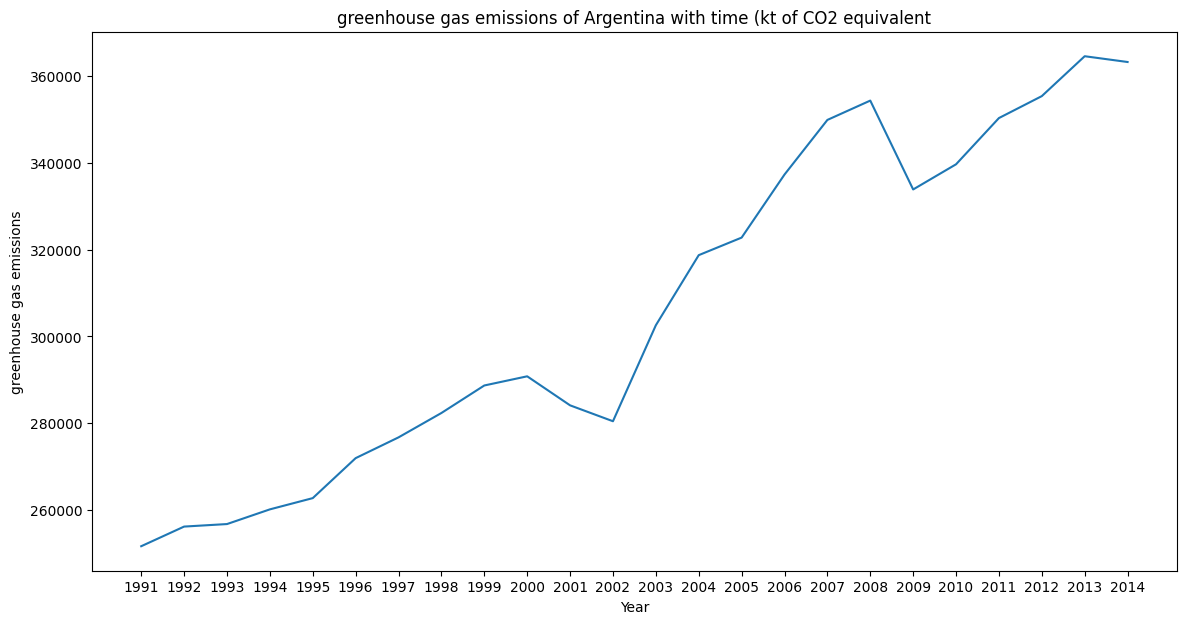

In [109]:

# Create a line graph
plt.figure(figsize=(14,7))
# df_argentina['Year']
plt.plot(df_argentina['Year'], df_argentina['Total greenhouse gas emissions (kt of CO2 equivalent)'])
plt.title("greenhouse gas emissions of Argentina with time (kt of CO2 equivalent")
plt.xlabel("Year")
plt.ylabel("greenhouse gas emissions")

# Show the graph
plt.show()

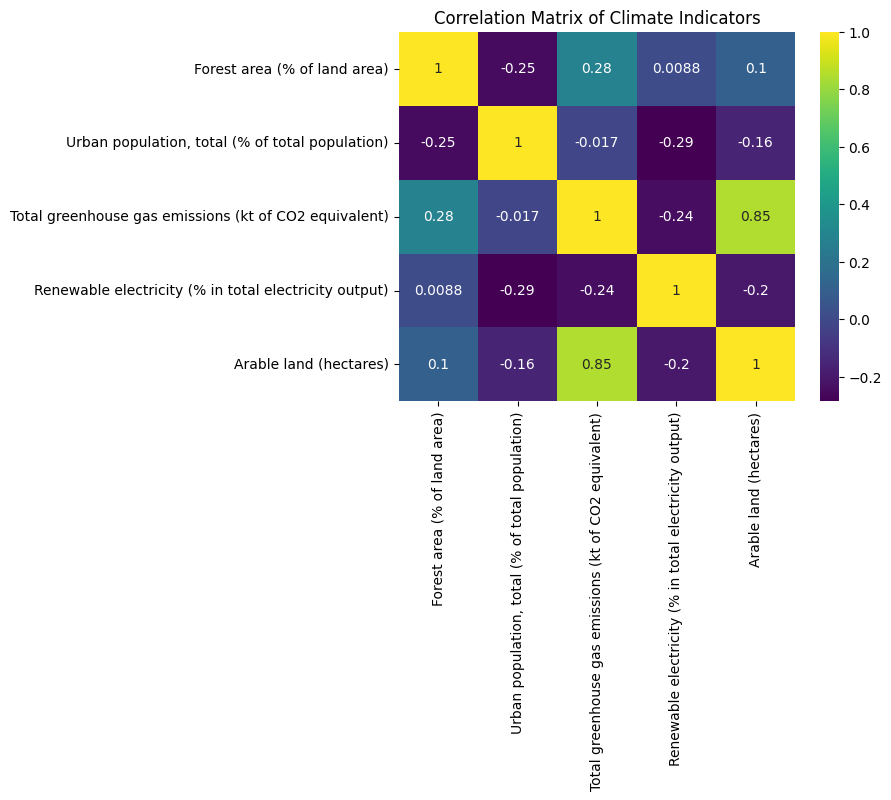

In [114]:
# create a correlation matrix
corr_matrix = df_countries.corr()

# plot the correlation matrix as a heatmap
sns.heatmap(corr_matrix, annot=True, cmap='viridis')
plt.title('Correlation Matrix of Climate Indicators')
plt.show()


Forest area has a negative correlation with greenhouse gas emissions, indicating that countries with larger forest areas tend to have lower greenhouse gas emissions.
Renewable electricity has a negative correlation with greenhouse gas emissions, which suggests that countries with a higher share of renewable electricity tend to have lower greenhouse gas emissions.
Urban population has a positive correlation with greenhouse gas emissions, indicating that more urbanized countries tend to have higher greenhouse gas emissions.
Arable land has a weak positive correlation with greenhouse gas emissions, suggesting that countries with more arable land may have slightly higher greenhouse gas emissions.

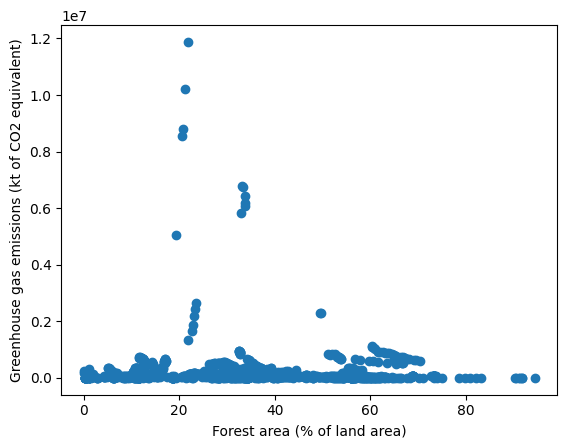

In [116]:
# import matplotlib.pyplot as plt

plt.scatter(df['Forest area (% of land area)'], df['Total greenhouse gas emissions (kt of CO2 equivalent)'])
plt.xlabel('Forest area (% of land area)')
plt.ylabel('Greenhouse gas emissions (kt of CO2 equivalent)')
plt.show()

asc

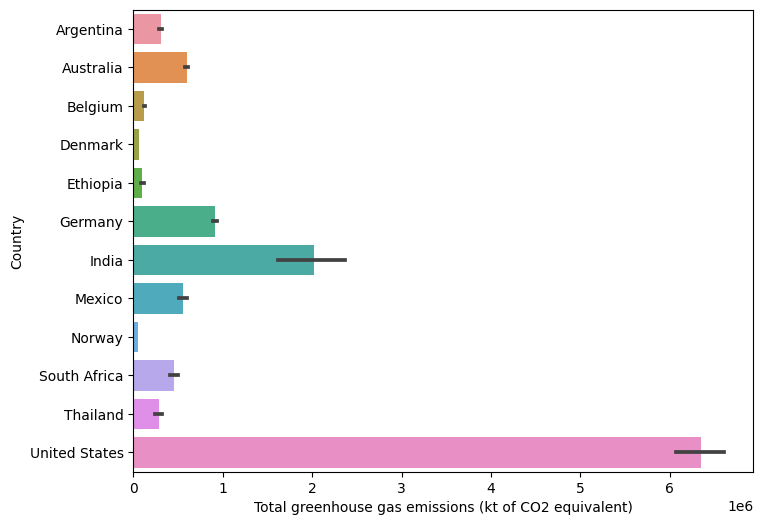

In [120]:
import seaborn as sns
plt.figure(figsize=(8,6))
sns.barplot(x='Total greenhouse gas emissions (kt of CO2 equivalent)', y='Country', data=df_countries)
plt.xlabel('Total greenhouse gas emissions (kt of CO2 equivalent)')
plt.ylabel('Country')
plt.show()


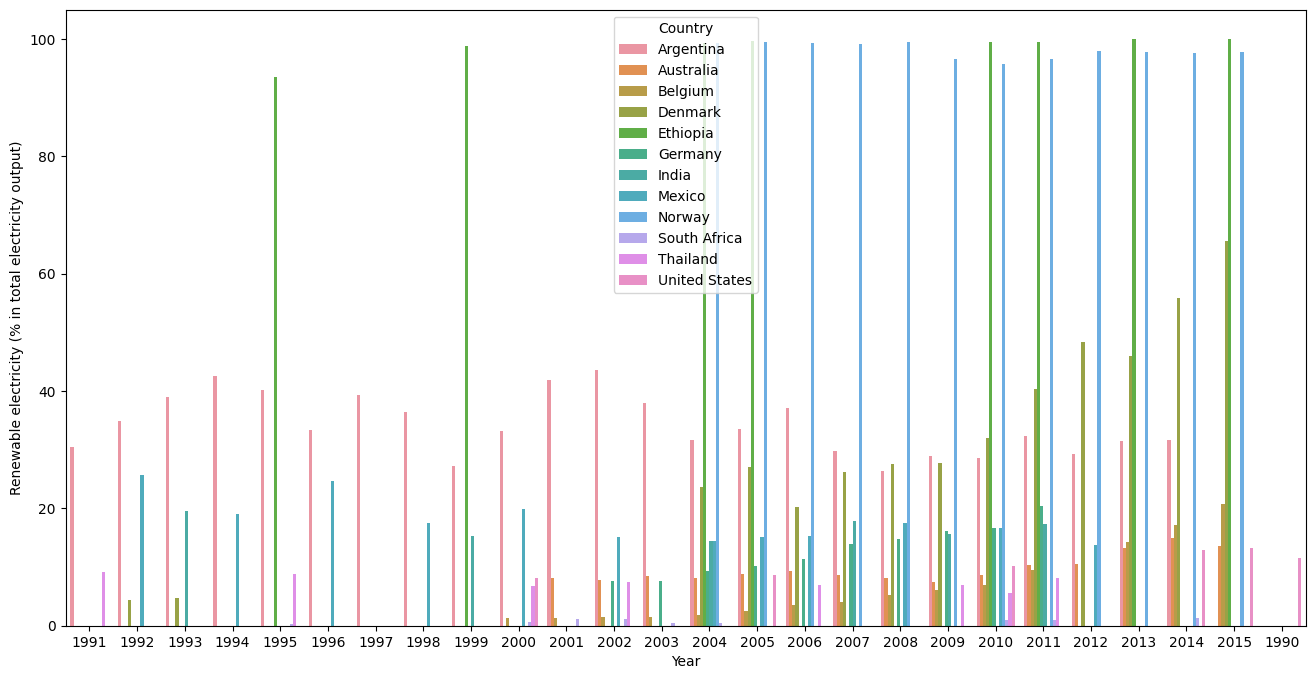

In [125]:
# select the countries and the renewable electricity column
countries = ['Australia', 'Belgium', 'Canada', 'Argentina', 'Denmark',
             'Ethiopia', 'Germany', 'India', 'Japan', 'Mexico',
             'Norway', 'Russia', 'South Africa', 'Thailand', 'United States']
plt.figure(figsize=(16,8))
# plot the data
sns.barplot(x='Year', y='Renewable electricity (% in total electricity output)', hue='Country', data=df_countries)
plt.xlabel('Year')
plt.ylabel('Renewable electricity (% in total electricity output)')
plt.show()


ascas

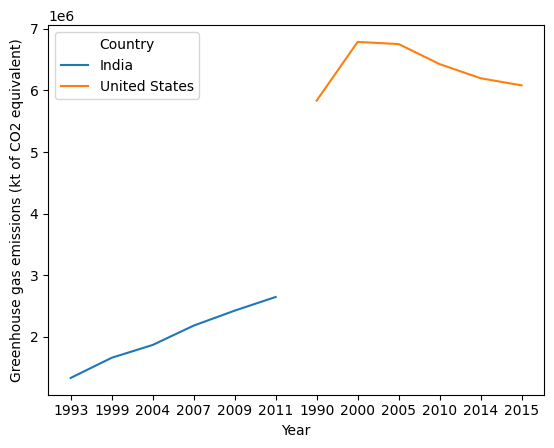

In [128]:


# select the countries and the greenhouse gas emissions column
countries = ['India', 'United States']
cols = ['Year', 'Country', 'Total greenhouse gas emissions (kt of CO2 equivalent)']
df_countries = df.loc[(df['Country'].isin(countries))]

# plot the data
sns.lineplot(x='Year', y='Total greenhouse gas emissions (kt of CO2 equivalent)', hue='Country', data=df_countries)
plt.xlabel('Year')
plt.ylabel('Greenhouse gas emissions (kt of CO2 equivalent)')
plt.show()


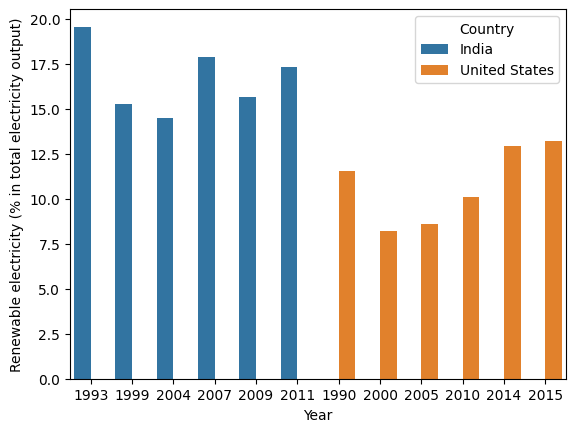

In [129]:
# select the countries and the renewable electricity column
cols = ['Year', 'Country', 'Renewable electricity (% in total electricity output)']
df_countries = df.loc[(df['Country'].isin(countries))]

# plot the data
sns.barplot(x='Year', y='Renewable electricity (% in total electricity output)', hue='Country', data=df_countries)
plt.xlabel('Year')
plt.ylabel('Renewable electricity (% in total electricity output)')
plt.show()
